In [1]:
import geopandas as gpd
import fiona
import gdal
from osgeo import ogr,osr
import rasterio as rio
from rasterio.mask import mask
import rasterio.features
import rasterio.warp

import matplotlib.pyplot as plt
import numpy as np
import math

import yaml
import json

from pathlib import Path
import os

In [2]:
ZOOM = 18
DATA  = Path('data')
RDATA = Path(f'{DATA}/try_satellite/')
VDATA = Path(f'{DATA}/vector/')

In [3]:
!tree {RDATA}

Folder PATH listing for volume Windows
Volume serial number is F4CD-4404
C:\GRAMENER APPLICATION\ETL\ETL\URBAN-HEAT-ISLAND-ETL\NOTEBOOK\DATA\TRY_SATELLITE
ÃÄÄÄ20133
³   ÃÄÄÄLC08_L1TP_042024_20130322_20170310_01_T1
³   ÀÄÄÄLC08_L1TP_042024_20130327_20170310_01_T1
ÀÄÄÄ20134
    ÀÄÄÄLC08_L1TP_042024_20130418_20170310_01_T1


In [4]:
!tree {VDATA}

Folder PATH listing for volume Windows
Volume serial number is 00000198 F4CD:4404
C:\GRAMENER APPLICATION\ETL\ETL\URBAN-HEAT-ISLAND-ETL\NOTEBOOK\DATA\VECTOR
ÃÄÄÄinput
ÃÄÄÄintermediate
ÀÄÄÄoutput


In [5]:
calgary_gdf = gpd.read_file(f'{VDATA}/input/calgary.geojson')
calgary_gdf = calgary_gdf.to_crs(epsg=32612)

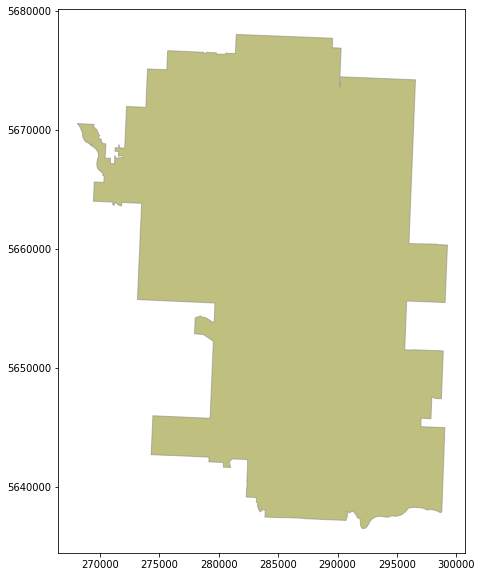

In [6]:
calgary_gdf.plot(figsize=(10, 10), color='olive', alpha=0.5, edgecolor='gray')

In [7]:
def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [8]:
r = list_files(RDATA)

In [9]:
for i in r :
    print(i)

data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_ANG.txt
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B1.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B10.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B11.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B2.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B3.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B4.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20130322_20170310_01_T1_B5.TIF
data\try_satellite\20133\LC08_L1TP_042024_20130322_20170310_01_T1\LC08_L1TP_042024_20

In [10]:
# path_list=[]
# subfolder_list=[]
# data_list=[]
# for idx, path in enumerate(r):
#     #print(path)
#     if path.split('\\')[4].split('_')[7].split('.')[1] =='TIF':
        
#         path1=path.split('\\')[4]
#        # print(path1)
#         a=str(path1)
#         path_list.append(a)
#     path2=path.split('\\')[2]
#     path2=str(path2)
#     subfolder_list.append(path2)
#     path3= path.split('\\')[3]
#     path3=str(path3)
#     data_list.append(path3)
    
#     print(path2 , path3)
# for i , j in enumerate (path_list):
#     #print(i) , print(j)
#     year_month1=j.split('_')[3]#.split('.')[0].split('_')[3]
#    # print(year_month1)
#     #year_month2=j.split('_')[4]#.split('.')[0].split('_')[4]
#     #print(year_month2)

### Clip the Raster to the specific region of interest using the boundary file

In [11]:
def clip_tile(name, bands=[2,3,4,5,6,7,10,11]):
    for band in bands:
        print(path2 , path3)
        #print(f'Processing band: B{band}', end=" ")
        tile = f'{RDATA}/{path2}/{path3}/{name}{band}.TIF'
        
        with rio.open(tile) as src:
            img, tfm = mask(src, calgary_gdf.geometry, crop=True)
            meta = src.meta
            meta.update({"driver": "GTiff",
                         "height": img.shape[1],
                         "width": img.shape[2],
                         "transform": tfm})
            print (img)
            Path(f'{DATA}/intermediate/{year_month1}/').mkdir(exist_ok=True)
            
            with rio.open(f'{DATA}/intermediate/{year_month1}/calgary_band_{band}.tif', "w", **meta) as f:
                f.write(img)
            
            #print('Done.')

In [12]:
path_list=[]
subfolder_list=[]
data_list=[]
for idx, path in enumerate(r):
    #print(path)
    if path.split('\\')[4].split('_')[7].split('.')[1] =='TIF':
        
        path1=path.split('\\')[4]
       # print(path1)
        a=str(path1)
        #print(a)
        path_list.append(a)
        year_month1=a.split('_')[3]#.split('.')[0].split('_')[3]
           # print(year_month1)
        year_month2=a.split('_')[4]#.split('.')[0].split('_')[4]
            #print(year_month2)
        path2=path.split('\\')[2]
        path2=str(path2)
        subfolder_list.append(path2)
        path3= path.split('\\')[3]
        path3=str(path3)
        data_list.append(path3)
        clip_tile(f'LC08_L1TP_042024_{year_month1}_{year_month2}_01_T1_B')
    
    
    
# for i , j in enumerate (path_list):
#     #print(i) , print(j)
#     year_month1=j.split('_')[3]#.split('.')[0].split('_')[3]
#    # print(year_month1)
#     year_month2=j.split('_')[4]#.split('.')[0].split('_')[4]
#     #print(year_month2)
#     clip_tile(f'LC08_L1TP_042024_{year_month1}_{year_month2}_01_T1_B')

LC08_L1TP_042024_20130322_20170310_01_T1_B1.TIF
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 .

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
LC08_L1TP_042024_20130322_20170310_01_T1_B5.TIF
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ..

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130322_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
LC08_L1TP_042024_20130327_20170310_01_T1_B1.TIF
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ..

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20133 LC08_L1TP_042024_20130327_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
LC08_L1TP_042024_20130418_20170310_01_T1_B4.TIF
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ..

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
LC08_L1TP_042024_20130418_20170310_01_T1_BQA.TIF
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
20134 LC08_L1TP_042024_20130418_20170310_01_T1
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 .

In [9]:
# #old
# path_list=[]
# for idx, path in enumerate(RDATA.glob('input/*.tif')):
#     #print(path)
#     a=str(path)
#     path_list.append(a)
# for i , j in enumerate (path_list):
#     #print(i) , print(j)
#     year_month1=j.split('\\')[3].split('.')[0].split('_')[3]
#     #print(year_month1)
#     year_month2=j.split('\\')[3].split('.')[0].split('_')[4]
#     #print(year_month2)
#     clip_tile(f'LC08_L1TP_042024_{year_month1}_{year_month2}_01_T1_B')

In [14]:
# Import User Config file to set globals
config_file = DATA/'config.yaml'
user_config = yaml.load(open(config_file), Loader=yaml.FullLoader)

# Globals
brightness_bands = user_config['UHI']['bands'].get('brightness', [])
reflectance_bands = user_config['UHI']['bands'].get('reflectance', [])
allbands = brightness_bands+reflectance_bands
crs = user_config['CRS']

# Globals 
f = open(f"{DATA}/LC08_L1TP_042024_20130322_20170310_01_T1_MTL.json", "r")
metadata = json.loads(f.read())

# Utils

def read_data_asarray(input_tiff_path):
    gtif = gdal.Open(input_tiff_path)
    band = gtif.GetRasterBand(1)
    bandArray = band.ReadAsArray()
    return band, bandArray


def show_map(maparray):
    %matplotlib inline
    plt.figure(figsize=(10,10))
    plt.imshow(maparray, cmap="RdYlGn")
    plt.colorbar()


def extract_brightness(band, tiff_data):
    res = {}
    radiometric_meta = metadata['L1_METADATA_FILE']['RADIOMETRIC_RESCALING']
    thermal_constans_meta = metadata['L1_METADATA_FILE']['TIRS_THERMAL_CONSTANTS']

    TOA_spectral_radiance = float(
        radiometric_meta[f'RADIANCE_MULT_BAND_{band}']
    ) * tiff_data[1] + float(radiometric_meta[f'RADIANCE_ADD_BAND_{band}'])

    top_atmos_brightness = thermal_constans_meta[f'K2_CONSTANT_BAND_{band}'] / np.log(
        (thermal_constans_meta[f'K1_CONSTANT_BAND_{band}'] / TOA_spectral_radiance
    ) + 1)

    res[band] = top_atmos_brightness
    return res


def extract_reflectance(band, tiff_data):
    res = {}
    radiometric_meta = metadata['L1_METADATA_FILE']['RADIOMETRIC_RESCALING']
    sun_elevation_meta = metadata['L1_METADATA_FILE']['IMAGE_ATTRIBUTES']['SUN_ELEVATION']

    TOA_planetary_reflectance_no = float(
        radiometric_meta[f'REFLECTANCE_MULT_BAND_{band}']
    ) * tiff_data[1] + float(radiometric_meta[f'REFLECTANCE_ADD_BAND_{band}'])

    theta_se = math.pi / 180 * float(sun_elevation_meta)
    # theta_sz = 90 - theta_se

    TOA_planetary_reflectance = TOA_planetary_reflectance_no / (math.sin(theta_se))
    # TOA_planetary_reflectance = TOA_planetary_reflectance_no / (np.cos(theta_sz))

    res[band] = TOA_planetary_reflectance
    return res

brightness = {}

for band in brightness_bands:
    tdata = read_data_asarray(f'{DATA}/intermediate/{year_month1}/calgary_band_{band}.tif')
    brightness.update(extract_brightness(band, tdata))

reflectance = {}
for band in reflectance_bands:
    tdata = read_data_asarray(f'{DATA}/intermediate/{year_month1}/calgary_band_{band}.tif')
    reflectance.update(extract_reflectance(band, tdata))

    
    ####

# Calculate LST
def calculate_NDVI(reflectance):
    check_4 = np.logical_and(reflectance[5] > 0, reflectance[4] > 0 ) ### Checking for nan/filler values in mir and nir
    NDVI = np.where(check_4, ((reflectance[5] - reflectance[4] ) / ( reflectance[5] + reflectance[4] )), -1)
    return NDVI
    

def calculate_NDBI(reflectance):
    check_6 = np.logical_and(reflectance[5] > 0, reflectance[6] > 0)
    NDBI = np.where(check_6, ((reflectance[5] - reflectance[6] ) / ( reflectance[5] + reflectance[6] )), -1)
    return NDBI


def calculate_vegetation(reflectance):
    NDVI = calculate_NDVI(reflectance)
    NDBI = calculate_NDBI(reflectance)
    vegetation_proportion = (NDVI - NDVI.min()) / (NDVI.max() - NDVI.min())**2
    return vegetation_proportion

def calculate_MNDWI(reflectance):
    check_6 = np.logical_and(reflectance[3] > 0, reflectance[6] > 0)
    MNDWI = np.where(check_6, ((reflectance[3] - reflectance[6] ) / ( reflectance[3] + reflectance[6] )), -1)
    return MNDWI

def calculate_ALBEDO(reflectance):
    check_6 = np.logical_and(reflectance[3] > 0, reflectance[6] > 0)
    ALBEDO = np.where(check_6, (((0.356 * reflectance[2]) + (0.130 * reflectance[4]) + (0.373 * reflectance[5])
                                 + (0.085 * reflectance[6]) + (0.072 * reflectance[7]) - 0.0018)/ 1.016) , -1)
    return ALBEDO

def calculate_emissivity(reflectance):
    vegetation_proportion = calculate_vegetation(reflectance)
    emissivity = 0.004 * vegetation_proportion + 0.986
    return emissivity
    
    
def calculate_LST(brightness, reflectance):
    emissivity = calculate_emissivity(reflectance)
    LST_10 = (brightness[10] / (1 + (0.00115 * brightness[10] / 1.4388) * np.log(emissivity))) - 273.15
    LST_11 = (brightness[11] / (1 + (0.00115 * brightness[11] / 1.4388) * np.log(emissivity))) - 273.15
    lst_avg = (np.array(LST_10) + np.array(LST_11)) / 2
    return lst_avg


###################################
path_list=[]
subfolder_list=[]
data_list=[]
for idx, path in enumerate(r):
    #print(path)
    if path.split('\\')[4].split('_')[7].split('.')[1] =='TIF':
        
        path1=path.split('\\')[4]
       # print(path1)
        a=str(path1)
        #print(a)
        path_list.append(a)
        year_month1=a.split('_')[3]#.split('.')[0].split('_')[3]
           # print(year_month1)
        year_month2=a.split('_')[4]#.split('.')[0].split('_')[4]
            #print(year_month2)
        path2=path.split('\\')[2]
        path2=str(path2)
        subfolder_list.append(path2)
        path3= path.split('\\')[3]
        path3=str(path3)
        data_list.append(path3)
    with rio.Env():
        region = rasterio.open(f"{DATA}/intermediate/{year_month1}/calgary_band_4.tif")
        profile = region.profile.copy()
        profile.update({'dtype': 'float32', 'count': 1})

        Path(f'{DATA}/output/landsat').mkdir(exist_ok=True)

        #LST
        lst_avg = calculate_LST(brightness, reflectance)
        lst_avg = lst_avg.astype('float32') 
        with rio.open(f'{DATA}/output/landsat/{year_month1}_calgary_lst.tif', 'w', **profile) as f:
                f.write(lst_avg, 1)

        #NDVI
        ndvi = calculate_NDVI(reflectance)
        ndvi = ndvi.astype('float32') 
        with rio.open(f'{DATA}/output/landsat/{year_month1}_calgary_ndvi.tif', 'w', **profile) as f:
                f.write(ndvi, 1)

        #NDBI
        ndbi = calculate_NDBI(reflectance)
        ndbi = ndbi.astype('float32') 
        with rio.open(f'{DATA}/output/landsat/{year_month1}_calgary_ndbi.tif', 'w', **profile) as f:
                f.write(ndbi, 1)

        #MNDWI
        mndwi = calculate_MNDWI(reflectance)
        mndwi = mndwi.astype('float32') 
        with rio.open(f'{DATA}/output/landsat/{year_month1}_calgary_mndwi.tif', 'w', **profile) as f:
                f.write(mndwi, 1)

        #ALBEDO
        albedo = calculate_ALBEDO(reflectance)
        albedo = albedo.astype('float32') 
        with rio.open(f'{DATA}/output/landsat/{year_month1}_calgary_albedo.tif', 'w', **profile) as f:
                f.write(albedo, 1)

### Compute LST, NDVI & NDBI at 30 meter resolution

In [25]:
!fio cat {VDATA}/input/calgary.geojson | supermercado burn {ZOOM} | mercantile shapes | fio collect > {VDATA}/intermediate/calgary_grid_{ZOOM}.geojson

In [26]:
!ogr2ogr -s_srs EPSG:4326 -t_srs EPSG:32612 {VDATA}/intermediate/calgary_grid_{ZOOM}_32612.geojson {VDATA}/intermediate/calgary_grid_{ZOOM}.geojson

ERROR 1: Can't load requested DLL: C:\ProgramData\Anaconda3\lib\site-packages\osgeo\gdalplugins\ogr_FileGDB.dll
126: The specified module could not be found.


ERROR 1: Can't load requested DLL: C:\ProgramData\Anaconda3\lib\site-packages\osgeo\gdalplugins\ogr_FileGDB.dll
126: The specified module could not be found.




In [13]:
data =gpd.read_file(f'{VDATA}/intermediate/calgary_grid_18_32612.geojson')

In [17]:
data.crs

<Projected CRS: EPSG:32612>
Name: WGS 84 / UTM zone 12N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 114°W to 108°W - by country
- bounds: (-114.0, 0.0, -108.0, 84.0)
Coordinate Operation:
- name: UTM zone 12N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# path_list=[]
# for idx, path in enumerate(RDATA.glob('output/*.tif')):
#     print(path)
#     a=str(path)
#     path_list.append(a)

In [36]:
# #%%time
# path_list=[]
# year_month1_list=[]
# for idx, path in enumerate(RDATA.glob('output/landsat/*.tif')):
#     #print(path)
#     a=str(path)
#     path_list.append(a)
# for i , j in enumerate (path_list):
#     #print(i) , print(j)
#     year_month1=j.split('\\')[4].split('_')[0]
#    # print(year_month1)
#     year_month1_list.append(year_month1)
    
# date_list = [] 
# [date_list.append(x) for x in year_month1_list if x not in date_list] 

# for i, j in enumerate (date_list):
#     print(f"{RDATA}/output/landsat/{j}_calgary_lst.tif")
#     !fio cat {VDATA}/intermediate/calgary_grid_{ZOOM}_32612.geojson | rio zonalstats -r {RDATA}/output/landsat/{j}_calgary_lst.tif  --band 1 --nodata 0 --prefix "lst_"  \
#                                                                    #  > {VDATA}/output/{j}_trial_lst.geojson

data\raster/output/landsat/20180822_calgary_lst.tif
data\raster/output/landsat/20200726_calgary_lst.tif


In [37]:
# #%%time
# path_list=[]
# year_month1_list=[]
# for idx, path in enumerate(r):
#     #print(path)
#     if path.split('\\')[4].split('_')[7].split('.')[1] =='TIF':
        
#         path1=path.split('\\')[4]
#        # print(path1)
#         a=str(path1)
#         print(a)
#         path_list.append(a)
#         year_month1=a.split('_')[3]#.split('.')[0].split('_')[3]
#         year_month1_list.append(year_month1)
    
# date_list = [] 
# [date_list.append(x) for x in year_month1_list if x not in date_list] 

# for i, j in enumerate (date_list):
#     print(f"{DATA}/output/landsat/{j}_calgary_lst.tif")
#     !fio cat {VDATA}/intermediate/calgary_grid_{ZOOM}_32612.geojson | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_lst.tif  --band 1 --nodata 0 --prefix "lst_"  \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_ndvi.tif --band 1 --nodata 0 --prefix "ndvi_" \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_ndbi.tif --band 1 --nodata 0 --prefix "ndbi_" \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_mndwi.tif --band 1 --nodata 0 --prefix "mndwi_" \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_albedo.tif --band 1 --nodata 0 --prefix "albedo_" \
#                                                                 > {VDATA}/output/{j}_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo.geojson
    

data\raster/output/landsat/20180822_calgary_lst.tif
data\raster/output/landsat/20200726_calgary_lst.tif


In [4]:
#%%time
path_list=[]
year_month1_list=[]
for idx, path in enumerate(DATA.glob('output/landsat/landsat/*.tif')):
    #print(path)
    a=str(path)
    path_list.append(a)
for i , j in enumerate (path_list):
    #print(i) , print(j)
    year_month1=j.split('\\')[4].split('_')[0]
    print(year_month1)
    year_month1_list.append(year_month1)

20130322
20130322
20130322
20130322
20130322
20130327
20130327
20130327
20130327
20130327
20130418
20130418
20130418
20130418
20130418
20130504
20130504
20130504
20130504
20130504
20130520
20130520
20130520
20130520
20130520
20130605
20130605
20130605
20130605
20130605
20130707
20130707
20130707
20130707
20130707
20130723
20130723
20130723
20130723
20130723
20130824
20130824
20130824
20130824
20130824
20130909
20130909
20130909
20130909
20130909
20130925
20130925
20130925
20130925
20130925
20131011
20131011
20131011
20131011
20131011
20131112
20131112
20131112
20131112
20131112
20131230
20131230
20131230
20131230
20131230
20140115
20140115
20140115
20140115
20140115
20140131
20140131
20140131
20140131
20140131
20140216
20140216
20140216
20140216
20140216
20140304
20140304
20140304
20140304
20140304
20140405
20140405
20140405
20140405
20140405
20140421
20140421
20140421
20140421
20140421
20140507
20140507
20140507
20140507
20140507
20140523
20140523
20140523
20140523
20140523
20140608
2

In [5]:
# #%%time
# path_list=[]
# year_month1_list=[]
# for idx, path in enumerate(DATA.glob('output/landsat/landsat/*.tif')):
#     #print(path)
#     a=str(path)
#     path_list.append(a)
# for i , j in enumerate (path_list):
#     #print(i) , print(j)
#     year_month1=j.split('\\')[4].split('_')[0]
#    # print(year_month1)
#     year_month1_list.append(year_month1)
    
# date_list = [] 
# [date_list.append(x) for x in year_month1_list if x not in date_list] 

# for i, j in enumerate (date_list):
#     print(f"{DATA}/output/landsat/landsat/{j}_calgary_lst.tif")
#     !fio cat {VDATA}/intermediate/calgary_grid_{ZOOM}_32612.geojson | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_lst.tif  --band 1 --nodata 0 --prefix "lst_"  \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_ndvi.tif --band 1 --nodata 0 --prefix "ndvi_" \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_ndbi.tif --band 1 --nodata 0 --prefix "ndbi_" \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_mndwi.tif --band 1 --nodata 0 --prefix "mndwi_" \
#                                                                 | rio zonalstats -r {DATA}/output/landsat/{j}_calgary_albedo.tif --band 1 --nodata 0 --prefix "albedo_" \
#                                                                 > {VDATA}/output/{j}_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo.geojson

In [6]:
#%%time
path_list=[]
year_month1_list=[]
for idx, path in enumerate(DATA.glob('output/landsat/landsat/*.tif')):
    #print(path)
    a=str(path)
    path_list.append(a)
for i , j in enumerate (path_list):
    #print(i) , print(j)
    year_month1=j.split('\\')[4].split('_')[0]
   # print(year_month1)
    year_month1_list.append(year_month1)
    
date_list = [] 
[date_list.append(x) for x in year_month1_list if x not in date_list] 

for i, j in enumerate (date_list):
    print(f"{DATA}/output/landsat/landsat/{j}_calgary_lst.tif")
    !fio cat {VDATA}/intermediate/calgary_grid_{ZOOM}_32612.geojson | rio zonalstats -r {DATA}/output/landsat/landsat/{j}_calgary_mndwi.tif --band 1 --nodata 0 --prefix "mndwi_" \
                                                                    | rio zonalstats -r {DATA}/output/landsat/landsat/{j}_calgary_albedo.tif --band 1 --nodata 0 --prefix "albedo_" \
                                                                    > {VDATA}/output/{j}_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo.geojson

data/output/landsat/landsat/20130322_calgary_lst.tif
data/output/landsat/landsat/20130327_calgary_lst.tif
data/output/landsat/landsat/20130418_calgary_lst.tif
data/output/landsat/landsat/20130504_calgary_lst.tif
data/output/landsat/landsat/20130520_calgary_lst.tif
data/output/landsat/landsat/20130605_calgary_lst.tif
data/output/landsat/landsat/20130707_calgary_lst.tif
data/output/landsat/landsat/20130723_calgary_lst.tif
data/output/landsat/landsat/20130824_calgary_lst.tif
data/output/landsat/landsat/20130909_calgary_lst.tif
data/output/landsat/landsat/20130925_calgary_lst.tif
data/output/landsat/landsat/20131011_calgary_lst.tif
data/output/landsat/landsat/20131112_calgary_lst.tif
data/output/landsat/landsat/20131230_calgary_lst.tif
data/output/landsat/landsat/20140115_calgary_lst.tif
data/output/landsat/landsat/20140131_calgary_lst.tif
data/output/landsat/landsat/20140216_calgary_lst.tif
data/output/landsat/landsat/20140304_calgary_lst.tif
data/output/landsat/landsat/20140405_calgary_l

# loop_in Ward and Community Data

In [13]:
comm_gdf=gpd.read_file(f'{VDATA}/input/community_census_2019.geojson')
comm_gdf=comm_gdf.to_crs(epsg=32612)
ward_gdf = gpd.read_file(f'{VDATA}/input/calgary_ward.geojson')[['ward_num', 'geometry']]
ward_gdf = ward_gdf.to_crs(epsg=32612)

def make_copy(gdf): return gdf.copy()

def drop_columns(gdf, cols): return gdf.drop(columns=cols)

def add_index(gdf): return gdf.reset_index().rename(columns={'index': 'id'})

def add_wards(gdf, ward): return gpd.sjoin(gdf, ward, how='left', op='intersects')

def add_community(gdf, community): return gpd.sjoin(gdf, community, how='left', op='intersects')

for i, j in enumerate (date_list):
    grid = gpd.read_file(f'{VDATA}/output/{j}_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo.geojson')
    grid=grid.set_crs(epsg=32612, inplace=True, allow_override=True)
    grid['idx'] = grid.id.str.findall(r'\d+').str.join('').astype(np.float)
    
    grid = (grid
        .pipe(make_copy)
#         .pipe(drop_columns, ['id', 'filename'])
        #.pipe(add_index)
        .pipe(add_wards, ward_gdf)
        .pipe(drop_columns, ['index_right'])
        .pipe(add_community, comm_gdf)
        .pipe(drop_columns, ['index_right']))
    
    #grid=add_index(grid)
    grid=grid[['id', 'title','mndwi_min','mndwi_mean','mndwi_max','albedo_min','albedo_mean','albedo_max','geometry','idx','ward_num', 'name' ]]
    
    grid.to_file(f"{VDATA}/community/{j}_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson", driver='GeoJSON')

## Merging at 30m